### <span style = 'color:green'> Create a machine learning model that can predict the pulser star </span>


**Support Vector Machines(SVM)**
- Support Vector Machines (SVMs in short) are machine learning algorithms that are used for classification and regression purposes. SVMs are one of the powerful machine learning algorithms for classification, regression and outlier detection purposes. An SVM classifier builds a model that assigns new data points to one of the given categories. Thus, it can be viewed as a non-probabilistic binary linear classifier.

**About the dataset**
- Pulsars are a rare type of Neutron star that produce radio emission detectable here on Earth. They are of considerable scientific interest as probes of space-time, the inter-stellar medium, and states of matter. Machine learning tools are now being used to automatically label pulsar candidates to facilitate rapid analysis. Classification systems in particular are being widely adopted,which treat the candidate data sets as binary classification problems.

**Expected output**
- **Missing values should be treated**
- **Perform Standerdisation and handle outliers**
- **perform Support Vector Mchines and tune the model to increase the efficiency of the model**

- For dataset please click here <a href="https://drive.google.com/file/d/19d2ocdl8d5rrE8Wc8nkBTFu_QrgtDt3q/view?usp=sharing
" title="Google Drive">Click here</a>




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import special
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
from scipy.stats import ttest_ind
import warnings
from sklearn.preprocessing import RobustScaler,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.feature_selection import SelectKBest, chi2,f_classif 
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTETomek
from sklearn.impute import KNNImputer
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
# Suppress all warnings
warnings.filterwarnings("ignore")

### Data Loading 

In [2]:
df = pd.read_csv('SVM.csv')

In [3]:
df.head()

Mean of the integrated profile  \
0                       121.156250   
1                        76.968750   
2                       130.585938   
3                       156.398438   
4                        84.804688   

    Standard deviation of the integrated profile  \
0                                      48.372971   
1                                      36.175557   
2                                      53.229534   
3                                      48.865942   
4                                      36.117659   

    Excess kurtosis of the integrated profile  \
0                                    0.375485   
1                                    0.712898   
2                                    0.133408   
3                                   -0.215989   
4                                    0.825013   

    Skewness of the integrated profile   Mean of the DM-SNR curve  \
0                            -0.013165                   3.168896   
1                             3.388719                   2.399666   
2                            -0.297242                   2.743311   
3                            -0.171294                  17.471572   
4                             3.274125                   2.790134   

    Standard deviation of the DM-SNR curve  \
0                                18.399367   
1                                17.570997   
2                                22.362553   
3                                      NaN   
4                                20.618009   

    Excess kurtosis of the DM-SNR curve   Skewness of the DM-SNR curve  \
0                              7.449874                      65.159298   
1                              9.414652                     102.722975   
2                              8.508364                      74.031324   
3                              2.958066                       7.197842   
4                              8.405008                      76.291128   

   target_class  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                17898 non-null  float64
 1    Standard deviation of the integrated profile  17898 non-null  float64
 2    Excess kurtosis of the integrated profile     15396 non-null  float64
 3    Skewness of the integrated profile            17898 non-null  float64
 4    Mean of the DM-SNR curve                      17898 non-null  float64
 5    Standard deviation of the DM-SNR curve        16196 non-null  float64
 6    Excess kurtosis of the DM-SNR curve           17898 non-null  float64
 7    Skewness of the DM-SNR curve                  17029 non-null  float64
 8   target_class                                   12528 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [5]:
df.dtypes

 Mean of the integrated profile                  float64
 Standard deviation of the integrated profile    float64
 Excess kurtosis of the integrated profile       float64
 Skewness of the integrated profile              float64
 Mean of the DM-SNR curve                        float64
 Standard deviation of the DM-SNR curve          float64
 Excess kurtosis of the DM-SNR curve             float64
 Skewness of the DM-SNR curve                    float64
target_class                                     float64
dtype: object

In [6]:
df.isnull().sum()

 Mean of the integrated profile                     0
 Standard deviation of the integrated profile       0
 Excess kurtosis of the integrated profile       2502
 Skewness of the integrated profile                 0
 Mean of the DM-SNR curve                           0
 Standard deviation of the DM-SNR curve          1702
 Excess kurtosis of the DM-SNR curve                0
 Skewness of the DM-SNR curve                     869
target_class                                     5370
dtype: int64

### Handling missing values

In [7]:
df.dropna(subset=['target_class'], inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12528 entries, 0 to 12527
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                12528 non-null  float64
 1    Standard deviation of the integrated profile  12528 non-null  float64
 2    Excess kurtosis of the integrated profile     10793 non-null  float64
 3    Skewness of the integrated profile            12528 non-null  float64
 4    Mean of the DM-SNR curve                      12528 non-null  float64
 5    Standard deviation of the DM-SNR curve        11350 non-null  float64
 6    Excess kurtosis of the DM-SNR curve           12528 non-null  float64
 7    Skewness of the DM-SNR curve                  11903 non-null  float64
 8   target_class                                   12528 non-null  float64
dtypes: float64(9)
memory usage: 978.8 KB


In [9]:
df.isnull().sum()

 Mean of the integrated profile                     0
 Standard deviation of the integrated profile       0
 Excess kurtosis of the integrated profile       1735
 Skewness of the integrated profile                 0
 Mean of the DM-SNR curve                           0
 Standard deviation of the DM-SNR curve          1178
 Excess kurtosis of the DM-SNR curve                0
 Skewness of the DM-SNR curve                     625
target_class                                        0
dtype: int64

In [10]:
df['target_class'] = df['target_class'].astype(int)

In [11]:
df.dtypes

 Mean of the integrated profile                  float64
 Standard deviation of the integrated profile    float64
 Excess kurtosis of the integrated profile       float64
 Skewness of the integrated profile              float64
 Mean of the DM-SNR curve                        float64
 Standard deviation of the DM-SNR curve          float64
 Excess kurtosis of the DM-SNR curve             float64
 Skewness of the DM-SNR curve                    float64
target_class                                       int64
dtype: object

In [12]:
# Initialize KNN imputer
imputer = KNNImputer(n_neighbors=5)
# Impute missing values for all columns
data_imputed = imputer.fit_transform(df)
df = pd.DataFrame(data_imputed, columns=df.columns)

In [13]:
df

Mean of the integrated profile  \
0                           121.156250   
1                            76.968750   
2                           130.585938   
3                           156.398438   
4                            84.804688   
...                                ...   
12523                       124.312500   
12524                       115.617188   
12525                       116.031250   
12526                       135.664062   
12527                       120.726562   

        Standard deviation of the integrated profile  \
0                                          48.372971   
1                                          36.175557   
2                                          53.229534   
3                                          48.865942   
4                                          36.117659   
...                                              ...   
12523                                      53.179053   
12524                                      46.784600   
12525                                      43.213846   
12526                                      49.933749   
12527                                      50.472256   

        Excess kurtosis of the integrated profile  \
0                                        0.375485   
1                                        0.712898   
2                                        0.133408   
3                                       -0.215989   
4                                        0.825013   
...                                           ...   
12523                                   -0.012418   
12524                                    0.218177   
12525                                    0.663456   
12526                                   -0.089940   
12527                                    0.346178   

        Skewness of the integrated profile   Mean of the DM-SNR curve  \
0                                -0.013165                   3.168896   
1                                 3.388719                   2.399666   
2                                -0.297242                   2.743311   
3                                -0.171294                  17.471572   
4                                 3.274125                   2.790134   
...                                    ...                        ...   
12523                            -0.556021                   7.186455   
12524                             0.226757                   6.140468   
12525                             0.433088                   0.785117   
12526                            -0.226726                   3.859532   
12527                             0.184797                   0.769231   

        Standard deviation of the DM-SNR curve  \
0                                    18.399367   
1                                    17.570997   
2                                    22.362553   
3                                    51.439932   
4                                    20.618009   
...                                        ...   
12523                                29.308266   
12524                                30.965862   
12525                                11.628149   
12526                                21.501505   
12527                                11.792603   

        Excess kurtosis of the DM-SNR curve   Skewness of the DM-SNR curve  \
0                                  7.449874                      65.159298   
1                                  9.414652                     102.722975   
2                                  8.508364                      74.031324   
3                                  2.958066                       7.197842   
4                                  8.405008                      76.291128   
...                                     ...                            ...   
12523                              4.531382                      21.725143   
12524                              5.732201                      34.357282   
12525        

In [14]:
df.isnull().sum()

 Mean of the integrated profile                  0
 Standard deviation of the integrated profile    0
 Excess kurtosis of the integrated profile       0
 Skewness of the integrated profile              0
 Mean of the DM-SNR curve                        0
 Standard deviation of the DM-SNR curve          0
 Excess kurtosis of the DM-SNR curve             0
 Skewness of the DM-SNR curve                    0
target_class                                     0
dtype: int64

In [15]:
df.groupby('target_class').count()

Mean of the integrated profile  \
target_class                                    
0.0                                     11375   
1.0                                      1153   

               Standard deviation of the integrated profile  \
target_class                                                  
0.0                                                   11375   
1.0                                                    1153   

               Excess kurtosis of the integrated profile  \
target_class                                               
0.0                                                11375   
1.0                                                 1153   

               Skewness of the integrated profile   Mean of the DM-SNR curve  \
target_class                                                                   
0.0                                         11375                      11375   
1.0                                          1153                       1153   

               Standard deviation of the DM-SNR curve  \
target_class                                            
0.0                                             11375   
1.0                                              1153   

               Excess kurtosis of the DM-SNR curve  \
target_class                                         
0.0                                          11375   
1.0                                           1153   

               Skewness of the DM-SNR curve  
target_class                                 
0.0                                   11375  
1.0                                    1153

### Performing Standerdisation and handle outliers

In [16]:
# Assuming 'df' is your DataFrame
scaler = StandardScaler()

# Separating features (X) and target variable (y)
X = df.drop('target_class', axis=1)
y = df['target_class']

# Standardizing the features
X_standardized = scaler.fit_transform(X)

# Creating a new DataFrame with standardized features
columns = X.columns  
standardized_df = pd.DataFrame(X_standardized, columns=columns)

# Adding the target_class back to the standardized DataFrame
standardized_df['target_class'] = y

# Displaying the resulting DataFrame with standardized features
standardized_df

Mean of the integrated profile  \
0                             0.393989   
1                            -1.327257   
2                             0.761306   
3                             1.766787   
4                            -1.022022   
...                                ...   
12523                         0.516935   
12524                         0.178225   
12525                         0.194354   
12526                         0.959115   
12527                         0.377251   

        Standard deviation of the integrated profile  \
0                                           0.272252   
1                                          -1.521273   
2                                           0.986368   
3                                           0.344739   
4                                          -1.529786   
...                                              ...   
12523                                       0.978945   
12524                                       0.038696   
12525                                      -0.486353   
12526                                       0.501751   
12527                                       0.580934   

        Excess kurtosis of the integrated profile  \
0                                       -0.098383   
1                                        0.218871   
2                                       -0.325997   
3                                       -0.654519   
4                                        0.324288   
...                                           ...   
12523                                   -0.463111   
12524                                   -0.246293   
12525                                    0.172383   
12526                                   -0.536002   
12527                                   -0.125939   

        Skewness of the integrated profile   Mean of the DM-SNR curve  \
0                                -0.288585                  -0.321013   
1                                 0.259381                  -0.346990   
2                                -0.334344                  -0.335385   
3                                -0.314056                   0.161989   
4                                 0.240922                  -0.333804   
...                                    ...                        ...   
12523                            -0.376027                  -0.185340   
12524                            -0.249939                  -0.220663   
12525                            -0.216704                  -0.401514   
12526                            -0.322985                  -0.297691   
12527                            -0.256698                  -0.402050   

        Standard deviation of the DM-SNR curve  \
0                                    -0.405126   
1                                    -0.447577   
2                                    -0.202022   
3                                     1.288120   
4                                    -0.291426   
...                                        ...   
12523                                 0.153928   
12524                                 0.238876   
12525                                -0.752133   
12526                                -0.246149   
12527                                -0.743706   

        Excess kurtosis of the DM-SNR curve   Skewness of the DM-SNR curve  \
0                                 -0.194818                      -0.378379   
1                                  0.238373                      -0.027468   
2                                  0.038556                      -0.295498   
3                                 -1.185162                      -0.919840   
4                                  0.015768                      -0.274388   
...                                     ...                            ...   
12523                             -0.838280                      -0.784130   
12524                             -0.573526                      -0.666123   
12525        

### Correlation matrix

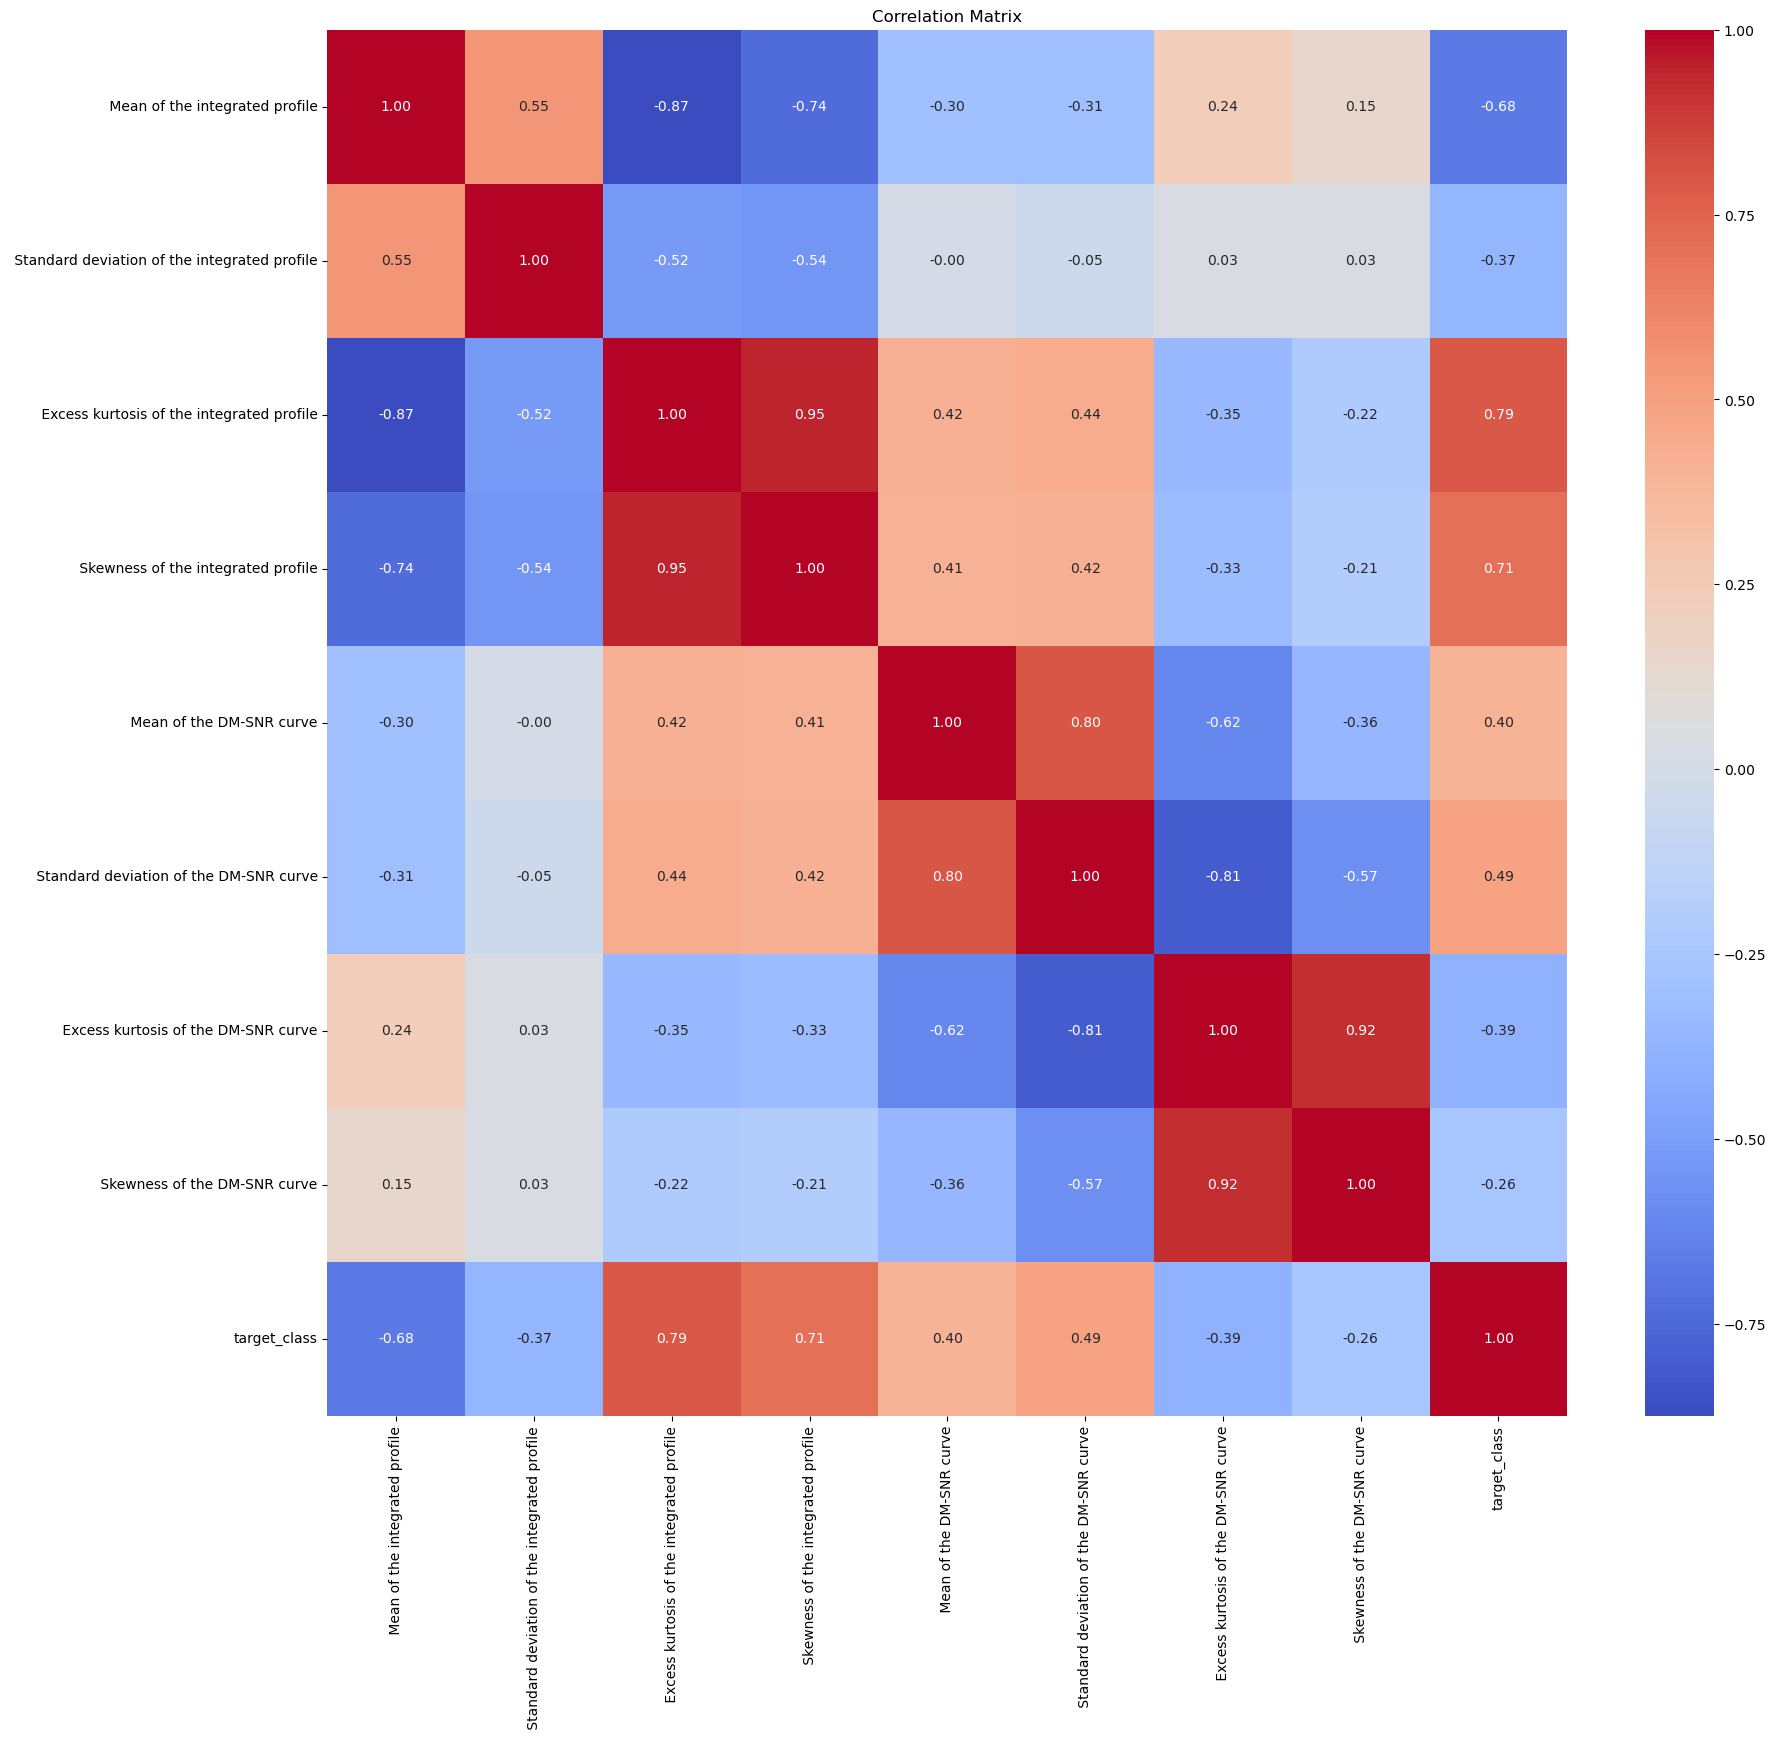

In [17]:
# Correlation matrix
correlation_matrix = standardized_df.corr()
plt.figure(figsize=(20, 18))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

### Finding outliers

In [18]:
plt.figure(figsize=(10, 6))  # Set the figure size

# Assuming 'data' contains numerical columns only
sns.boxplot(data=standardized_df.drop('target_class', axis=1))
plt.xticks(rotation=85)  # Rotate x-axis labels for better readability
plt.show()

In [19]:
# Extract columns except the target variable (assuming 'target_class' is the target column)
features = standardized_df.drop('target_class', axis=1)

# Calculate Q1 and Q3 for the features
Q1 = features.quantile(0.25)
Q3 = features.quantile(0.75)

# Calculate IQR for the features
IQR = Q3 - Q1

# Define a threshold to detect outliers (e.g., 1.5 times the IQR)
threshold = 1.5

# Find outliers for the features
lower_bound = Q1 - threshold * IQR
upper_bound = Q3 + threshold * IQR

# Identify rows without outliers for the features
no_outliers = ((features >= lower_bound) & (features <= upper_bound)).all(axis=1)

# Filter the DataFrame to remove outliers for the features
finalDf = standardized_df[no_outliers]

In [20]:
finalDf

Mean of the integrated profile  \
0                             0.393989   
2                             0.761306   
5                             0.388207   
7                            -0.063712   
8                            -0.624577   
...                                ...   
12520                         0.168791   
12522                         0.537020   
12523                         0.516935   
12524                         0.178225   
12526                         0.959115   

        Standard deviation of the integrated profile  \
0                                           0.272252   
2                                           0.986368   
5                                           0.096387   
7                                           1.380878   
8                                          -0.926601   
...                                              ...   
12520                                       0.897607   
12522                                       0.597766   
12523                                       0.978945   
12524                                       0.038696   
12526                                       0.501751   

        Excess kurtosis of the integrated profile  \
0                                       -0.098383   
2                                       -0.325997   
5                                       -0.235451   
7                                        0.079909   
8                                       -0.124623   
...                                           ...   
12520                                   -0.029277   
12522                                   -0.231826   
12523                                   -0.463111   
12524                                   -0.246293   
12526                                   -0.536002   

        Skewness of the integrated profile   Mean of the DM-SNR curve  \
0                                -0.288585                  -0.321013   
2                                -0.334344                  -0.335385   
5                                -0.271753                  -0.359245   
7                                -0.277405                  -0.333550   
8                                -0.100716                  -0.334482   
...                                    ...                        ...   
12520                            -0.269648                  -0.314745   
12522                            -0.332679                  -0.348910   
12523                            -0.376027                  -0.185340   
12524                            -0.249939                  -0.220663   
12526                            -0.322985                  -0.297691   

        Standard deviation of the DM-SNR curve  \
0                                    -0.405126   
2                                    -0.202022   
5                                    -0.432822   
7                                    -0.348899   
8                                    -0.414433   
...                                        ...   
12520                                -0.406848   
12522                                -0.633146   
12523                                 0.153928   
12524                                 0.238876   
12526                                -0.246149   

        Excess kurtosis of the DM-SNR curve   Skewness of the DM-SNR curve  \
0                                 -0.194818                      -0.378379   
2                                  0.038556                      -0.295498   
5                                  0.267343                       0.060426   
7                                  0.244685                      -0.077432   
8                                 -0.106333                      -0.325667   
...                                     ...                            ...   
12520                             -0.214914                      -0.372730   
12522                              0.196820                       0.108783   
12523        

In [21]:
finalDf.isnull().sum()

 Mean of the integrated profile                  0
 Standard deviation of the integrated profile    0
 Excess kurtosis of the integrated profile       0
 Skewness of the integrated profile              0
 Mean of the DM-SNR curve                        0
 Standard deviation of the DM-SNR curve          0
 Excess kurtosis of the DM-SNR curve             0
 Skewness of the DM-SNR curve                    0
target_class                                     0
dtype: int64

In [61]:
finalDf.groupby('target_class').count()

Mean of the integrated profile  \
target_class                                    
0.0                                      9206   
1.0                                       110   

               Standard deviation of the integrated profile  \
target_class                                                  
0.0                                                    9206   
1.0                                                     110   

               Excess kurtosis of the integrated profile  \
target_class                                               
0.0                                                 9206   
1.0                                                  110   

               Skewness of the integrated profile   Mean of the DM-SNR curve  \
target_class                                                                   
0.0                                          9206                       9206   
1.0                                           110                        110   

               Standard deviation of the DM-SNR curve  \
target_class                                            
0.0                                              9206   
1.0                                               110   

               Excess kurtosis of the DM-SNR curve  \
target_class                                         
0.0                                           9206   
1.0                                            110   

               Skewness of the DM-SNR curve  
target_class                                 
0.0                                    9206  
1.0                                     110

### SVM Model

In [22]:

x = finalDf.drop('target_class', axis=1)
y = finalDf['target_class']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Balance the training data using SMOTETomek
smt = SMOTETomek(random_state=42)
X_train_balanced, y_train_balanced = smt.fit_resample(X_train, y_train)

# SVM model initialization and training using the balanced training data
svm = SVC()
svm.fit(X_train_balanced, y_train_balanced)

# Predictions on the original test set
predictions = svm.predict(X_test)

# Evaluation metrics on the original test set
print("Classification Report:\n", classification_report(y_test, predictions))
print("Accuracy:", accuracy_score(y_test, predictions))

# Confusion matrix on the original test set
confusion = confusion_matrix(y_test, predictions)
print("Confusion Matrix:\n", confusion)

Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      0.84      0.91      1834
         1.0       0.05      0.53      0.10        30

    accuracy                           0.84      1864
   macro avg       0.52      0.69      0.50      1864
weighted avg       0.98      0.84      0.90      1864

Accuracy: 0.8385193133047211
Confusion Matrix:
 [[1547  287]
 [  14   16]]


### Model Accuracy Improvement 

In [23]:
# Assuming 'finalDf' contains your features and target variable
x = finalDf.drop('target_class', axis=1)
y = finalDf['target_class']

param_grid = {
    'C': [0.1, 1, 10],                # Regularization parameter
    'gamma': [1, 0.1, 0.01, 0.001],   # Kernel coefficient
    'kernel': ['rbf', 'linear']       # Kernel type
}

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Balance the training data using SMOTETomek
smt = SMOTETomek(random_state=42)
X_train_balanced, y_train_balanced = smt.fit_resample(X_train, y_train)

# Initialize an SVM model
svm = SVC()

# Initialize GridSearchCV with the SVM model and parameter grid
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy')

try:
    # Fit the GridSearchCV to the balanced training data
    grid_search.fit(X_train_balanced, y_train_balanced)

    # Get the best parameters found by GridSearchCV
    best_params = grid_search.best_params_
    print("Best Parameters:", best_params)

    # Train a new SVM model with the best parameters
    best_svm = SVC(**best_params)
    best_svm.fit(X_train_balanced, y_train_balanced)

    # Predictions on the original test set using the tuned model
    predictions = best_svm.predict(X_test)

    # Evaluate the tuned model
    print("Classification Report:\n", classification_report(y_test, predictions))
    print("Accuracy:", accuracy_score(y_test, predictions))
    print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))

except Exception as e:
    print("An error occurred:", e)

Best Parameters: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      0.91      0.95      1834
         1.0       0.07      0.40      0.12        30

    accuracy                           0.90      1864
   macro avg       0.53      0.66      0.53      1864
weighted avg       0.97      0.90      0.94      1864

Accuracy: 0.9028969957081545
Confusion Matrix:
 [[1671  163]
 [  18   12]]


### Testing the model with Input data

In [59]:
##Passing scaled data as input

input_data = np.array([
    [0.393989,0.272252,-0.098383,-0.288585,-0.321013,-0.405126,-0.194818,-0.378379]
])

predictions = best_svm.predict(input_data)
print("prdeicted data is:",predictions)

prdeicted data is: [0.]


In [60]:
##Passing scaled data as input

input_data = np.array([
    [0.6042756820207132,-0.221753784,-0.093839111,-0.236763852,-0.259741584,0.13202842720093128,-0.528016902,-0.660885891]
])


predictions = best_svm.predict(input_data)
print("prdeicted data is:",predictions)

prdeicted data is: [1.]


### Conclusion 

#### Precision:
##### Class 0 : 99% - When the model predicts class 0, it's correct 99% of the time.
##### Class 1 : 7% - When the model predicts class 1, it's correct only 7% of the time
    
#### Recall :
##### Class 0: 91% - The model identifies 91% of actual class 0 instances.
##### Class 1: 40% - The model identifies only 40% of actual class 1 instances  
    
#### F1-Score:
##### Class 0: 95% - The harmonic mean of precision and recall for class 0.
##### Class 1: 12% - The harmonic mean of precision and recall for class 1
    
#### Accuracy:
##### The overall accuracy of the model is approximately 90.29%. 
##### This represents the proportion of correctly predicted instances out of the total

#### Cofusion matrix:
    
##### True Positives (TP): 12 instances were correctly predicted as class 1.
##### False Positives (FP): 163 instances were incorrectly predicted as class 1.
##### True Negatives (TN): 1671 instances were correctly predicted as class 0.
##### False Negatives (FN): 18 instances were incorrectly predicted as class 0.

### This report suggests that while the model performs admirably for class 0, 
### its performance for class 1 needs improvement, 
### especially in correctly identifying and predicting instances of that class. This is due to less data for class 1 even though i have did some balanicng the data using SMOTETomek still it lacks in predicitng class 1 , we might need to get more data for type 1